In [23]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
img1 = cv2.imread('Computer-Vision-with-Python\DATA\dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("Computer-Vision-with-Python\DATA\watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

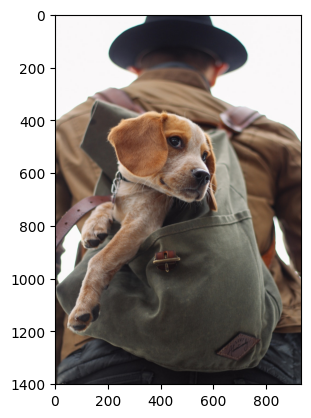

In [25]:
plt.imshow(img1)

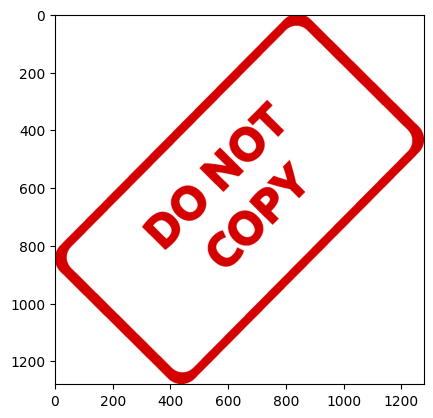

In [26]:
plt.imshow(img2)

In [27]:
img1.shape

(1401, 934, 3)

In [28]:
img2.shape

(1280, 1277, 3)

resizing both the images

In [29]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

In [30]:
img1.shape

(1200, 1200, 3)

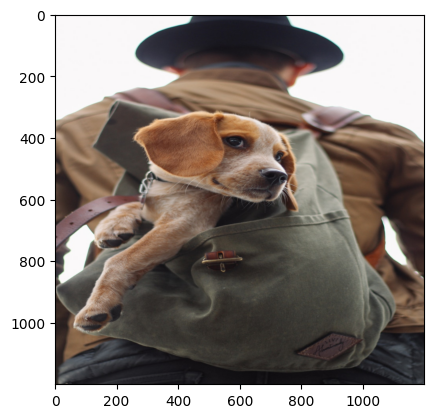

In [31]:
plt.imshow(img1)

In [32]:
img2.shape

(1200, 1200, 3)

Blending both the images


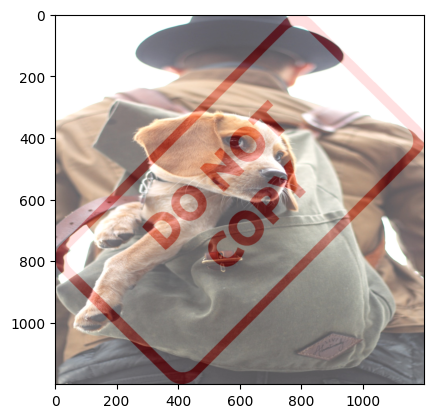

In [42]:
blended_image = cv2.addWeighted(src1=img1,src2=img2,alpha=0.9,beta=0.3,gamma = 0.5)
plt.imshow(blended_image)

Blending the images with different sizes

In [43]:
# Overlaying a small image on top of larger image (No Blending)
# Numpy reassignment

In [44]:
img1 = cv2.imread('Computer-Vision-with-Python\DATA\dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("Computer-Vision-with-Python\DATA\watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [46]:
img2 = cv2.resize(img2,(600,600))

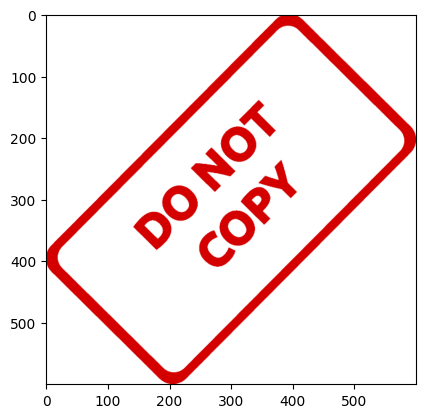

In [47]:
plt.imshow(img2)

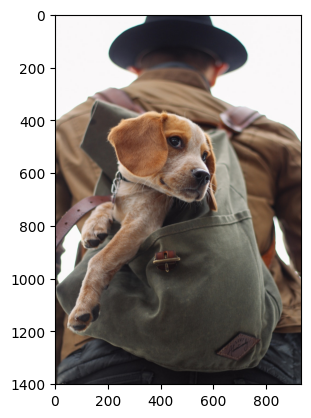

In [48]:
plt.imshow(img1)

In [64]:
large_img = img1
small_img = img2

In [65]:
x_offset = 0
y_offset = 0

In [69]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [70]:
large_img.shape

(1401, 934, 3)

In [71]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

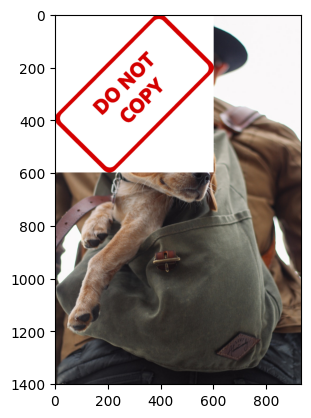

In [72]:
plt.imshow(large_img)

BLENDING TOGETHER IMAGES OF DIFFERENT SIZES

In [73]:
img1 = cv2.imread('Computer-Vision-with-Python\DATA\dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("Computer-Vision-with-Python\DATA\watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [74]:
img2 = cv2.resize(img2,(600,600))

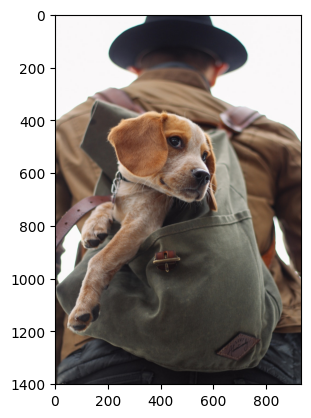

In [76]:
plt.imshow(img1)

In [77]:
img1.shape

(1401, 934, 3)

In [79]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]

In [80]:
rows,cols, channels = img2.shape

In [81]:
rows

600

In [82]:
cols

600

In [ ]:
roi = img1[y_offset:img1.shape[0],x_offset:img1.shape[1]]

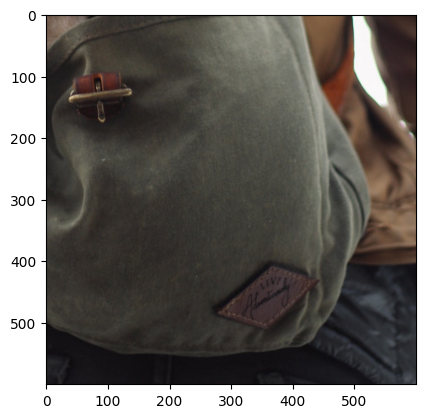

In [87]:
plt.imshow(roi)

In [88]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

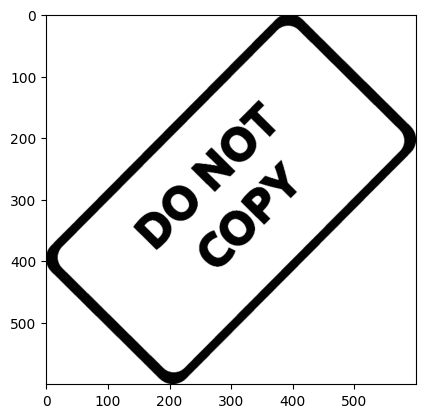

In [90]:
plt.imshow(img2gray, cmap = "gray")

In [91]:
mask_inv = cv2.bitwise_not(img2gray)

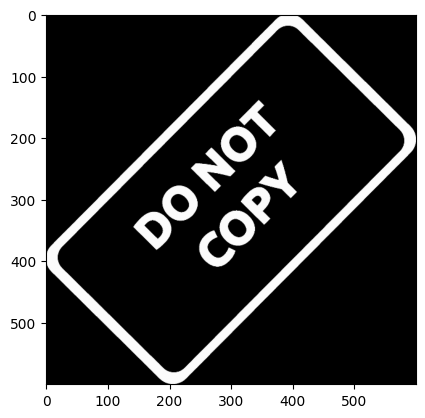

In [93]:
plt.imshow(mask_inv,cmap="gray")

In [94]:
mask_inv.shape

(600, 600)

since mask_inv has no color channels it won't go blend with the original array of image with 3 color channels so we need to add that color channel 

In [95]:
import numpy as np

In [96]:
white_bg = np.full(img2.shape,255, dtype = np.uint8)

In [97]:
bk = cv2.bitwise_or(white_bg,white_bg, mask = mask_inv)

In [98]:
bk.shape

(600, 600, 3)

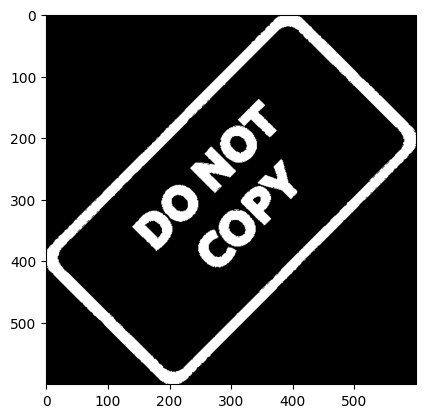

In [99]:
plt.imshow(bk)

In [100]:
fg = cv2.bitwise_or(img2,img2,mask = mask_inv)

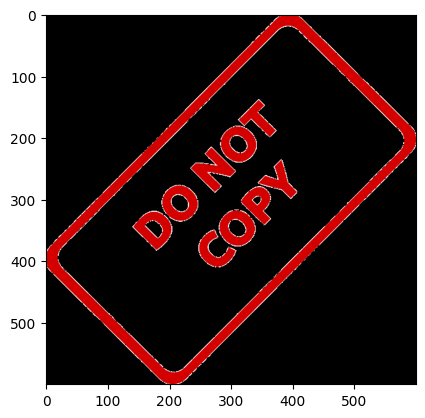

In [101]:
plt.imshow(fg)

In [102]:
final_roi = cv2.bitwise_or(roi,fg)

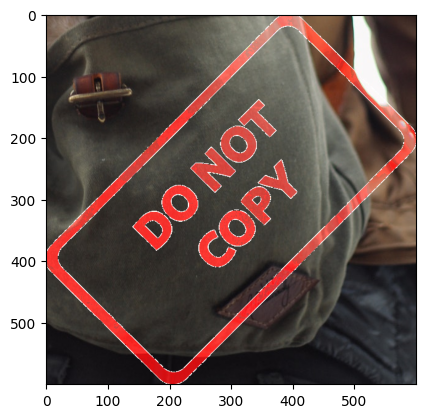

In [103]:
plt.imshow(final_roi)

In [104]:
large_img = img1
small_img = final_roi

In [105]:
x_offset = large_img.shape[1] - small_img.shape[1]
y_offset = large_img.shape[0] - small_img.shape[0]

In [106]:
large_img[y_offset : large_img.shape[0], x_offset:large_img.shape[1]] = small_img

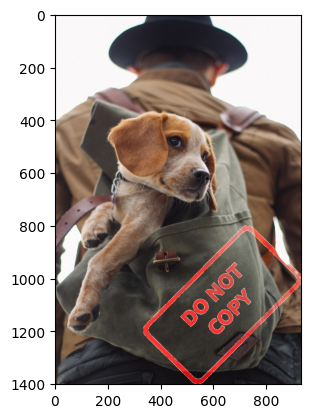

In [107]:
plt.imshow(large_img)